In [20]:
# Pull the data into this Python session:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns
GamesDF = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
GamesDF.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Now, I fill the missing values

GamesDF = GamesDF.fillna(value=-1)
GamesDF.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,-1.0,-1.0,-1,-1.0,-1,-1
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,-1.0,-1.0,-1,-1.0,-1,-1


In [22]:
# Now I create variables where entire rows are dropped if values from particular columns are missing

GamesDF_Dropped_CS = GamesDF[GamesDF.Critic_Score != -1]
GamesDF_Dropped_CC = GamesDF[GamesDF.Critic_Count != -1]
GamesDF_Dropped_US = GamesDF[GamesDF.User_Score != -1]
GamesDF_Dropped_UC = GamesDF[GamesDF.User_Count != -1]
GamesDF_Dropped_D = GamesDF[GamesDF.Developer != -1]
GamesDF_Dropped_R = GamesDF[GamesDF.Rating != -1]
GamesDF_Dropped_Y = GamesDF[GamesDF.Year_of_Release != -1]

GamesDF_Dropped_All = GamesDF[GamesDF.Name != -1]
GamesDF_Dropped_All = GamesDF[GamesDF.Platform != -1]
GamesDF_Dropped_All = GamesDF[GamesDF.Year_of_Release != -1]
GamesDF_Dropped_All = GamesDF[GamesDF.Genre != -1]
GamesDF_Dropped_All = GamesDF[GamesDF.Publisher != -1]
GamesDF_Dropped_All = GamesDF[GamesDF.NA_Sales != -1]
GamesDF_Dropped_All = GamesDF[GamesDF.EU_Sales != -1]
GamesDF_Dropped_All = GamesDF[GamesDF.JP_Sales != -1]
GamesDF_Dropped_All = GamesDF[GamesDF.Other_Sales != -1]
GamesDF_Dropped_All = GamesDF[GamesDF.Global_Sales != -1]
GamesDF_Dropped_All = GamesDF[GamesDF.Critic_Score != -1]
GamesDF_Dropped_All = GamesDF[GamesDF.Critic_Count != -1]
GamesDF_Dropped_All = GamesDF[GamesDF.User_Score != -1]
GamesDF_Dropped_All = GamesDF[GamesDF.User_Count != -1]
GamesDF_Dropped_All = GamesDF[GamesDF.Developer != -1]
GamesDF_Dropped_All = GamesDF[GamesDF.Rating != -1]

GamesDF_Dropped_All.head()

                              

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


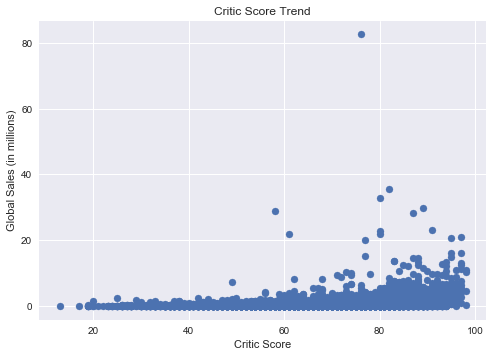

In [23]:
# Plot Critic Score:

plt.scatter(GamesDF_Dropped_CS.Critic_Score, GamesDF_Dropped_CS.Global_Sales)
plt.xlabel('Critic Score')
plt.ylabel('Global Sales (in millions)')
plt.title('Critic Score Trend')
plt.show()

# It looks like there is a loose positive correlation with game rank and critic score

In [24]:
GamesDF_Dropped_All.sort_values('Year_of_Release')
# The last game titled "Imagine: Makeup Artist" has the year 2020, which has not occurred yet, so this is -
# Obviously an error.
# After looking it up, it appears that this game was actually release in 2009, so I must fix this in the dataframe

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
8885,eJay Clubworld,PS2,-1.0,Misc,Empire Interactive,0.07,0.06,0.00,0.02,0.15,69.0,5.0,8.6,10.0,UDS,E
6637,Jonah Lomu Rugby Challenge,PS3,-1.0,Sports,Home Entertainment Suppliers,0.00,0.19,0.00,0.06,0.25,64.0,6.0,-1,-1.0,Sidhe Interactive,E
12785,Tom Clancy's Rainbow Six: Critical Hour,XB,-1.0,Shooter,Unknown,0.04,0.01,0.00,0.00,0.06,54.0,10.0,3.6,14.0,Ubisoft Quebec,M
4945,Robert Ludlum's The Bourne Conspiracy,PS3,-1.0,Action,Vivendi Games,0.18,0.14,0.00,0.06,0.39,70.0,47.0,7.6,43.0,High Moon Studios,T
805,Rock Band,Wii,-1.0,Misc,MTV Games,1.33,0.56,0.00,0.20,2.08,80.0,21.0,6.3,37.0,Harmonix Music Systems,T
9044,Bejeweled 3,PS3,-1.0,Puzzle,Unknown,0.13,0.00,0.00,0.02,0.14,76.0,5.0,8.2,5.0,PopCap,E
12881,Jewel Link Chronicles: Mountains of Madness,DS,-1.0,Puzzle,Avanquest,0.00,0.05,0.00,0.01,0.05,-1.0,-1.0,tbd,-1.0,Avanquest Software,E10+
12897,Captain America: Super Soldier,Wii,-1.0,Action,Sega,0.05,0.00,0.00,0.00,0.05,57.0,16.0,6,6.0,High Voltage Software,T
4848,Harvest Moon: Save the Homeland,PS2,-1.0,Simulation,Unknown,0.19,0.15,0.00,0.05,0.40,76.0,14.0,8.8,72.0,Victor Interactive Software,E
4818,LEGO Harry Potter: Years 5-7,3DS,-1.0,Action,Warner Bros. Interactive Entertainment,0.18,0.19,0.00,0.03,0.40,71.0,7.0,6.5,11.0,Traveller's Tales,E10+


In [25]:
GamesDF_Dropped_All

NameError: name 'GamesDF_Dropped' is not defined